# CRISP-DM (Cross-Industry Standard Process for Data Mining) 
is a commonly used methodology for conducting data science projects. The steps involved are:

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment
In this project, we will follow the steps in the CRISP-DM framework to analyze the data collected from the patients and build a model to predict the presence of chronic kidney disease.

In [81]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, , accuracy_score
from sklearn import tree




In [13]:
#load dataset
df = pd.read_csv('~/Library/CloudStorage/OneDrive-HanzehogeschoolGroningen/Semester2/MachineLearning/Data/chronic_kidney_disease_full.csv', sep=',', header=0, na_values='?')
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


## 1. Business Understanding:

The objective of our project is to predict the presence of chronic kidney disease (CKD) in patients using a variety of health metrics. This prediction could be beneficial for healthcare providers to proactively diagnose and treat CKD, potentially improving patient outcomes and decreasing healthcare costs.

## 2. Data Understanding:

The dataset provided to us is a comprehensive dataset with 24 features, collected from a hospital over a period of two months. The dataset comprises both numerical and nominal features related to patient health and specific medical conditions.

The target feature is a nominal variable that represents whether a patient has chronic kidney disease or not. The predictor features include demographic data like age and a variety of medical measurements, including blood pressure, blood glucose levels, and the presence of specific conditions like hypertension, diabetes, and anemia.

As we proceed, we'll need to thoroughly explore and understand this dataset to identify any data quality issues and understand the relationships between different variables. We'll also need to confirm if the dataset is balanced or imbalanced with respect to the target variable, CKD.

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

Our dataset contains information from 400 patients collected from a hospital over two months. It consists of both numerical and categorical features. The dataset is comprised of the following columns:

**Numerical Features:**

- Age (age): The age of the patient.
- Blood Pressure (bp): The blood pressure of the patient.
- Specific Gravity (sg): This is a test to check the kidney's filtering ability.
- Albumin (al): Albumin level.
- Sugar (su): Sugar levels in the urine.
- Blood Glucose Random (bgr): A random measurement of blood glucose.
- Blood Urea (bu): Urea level in the blood.
- Serum Creatinine (sc): Creatinine level in the blood.
- Sodium (sod): Sodium level in the blood.
- Potassium (pot): Potassium level in the blood.
- Hemoglobin (hemo): Hemoglobin level.
- Packed Cell Volume (pcv): The volume percentage of red blood cells in blood.
- White Blood Cell Count (wbcc): The number of white blood cells.
- Red Blood Cell Count (rbcc): The number of red blood cells.

**Categorical Features:**

- Red Blood Cells (rbc): This indicates whether the red blood cell count is normal or abnormal.
- Pus Cell (pc): This indicates whether the pus cell count is normal or abnormal.
- Pus Cell Clumps (pcc): This indicates whether pus cell clumps are present or not present.
- Bacteria (ba): This indicates whether bacteria are present or not present.
- Hypertension (htn): This indicates whether the patient has hypertension (high blood pressure) or not.
- Diabetes Mellitus (dm): This indicates whether the patient has diabetes or not.
- Coronary Artery Disease (cad): This indicates whether the patient has coronary artery disease or not.
- Appetite (appet): This indicates whether the patient has a good or poor appetite.
- Pedal Edema (pe): This indicates whether the patient has swelling in the feet or not.
- Anemia (ane): This indicates whether the patient has anemia or not.

**Target Variable:**

- Class: The target variable, indicating the presence of chronic kidney disease or not.

In [15]:
#make a copy of the dataset
df_copy = df.copy()

In [16]:
# Convert target variable to numerical so it can be used in correlation calculation
df['class'] = df['class'].map({'ckd': 1, 'notckd': 0})
df['class'].value_counts()

1    250
0    150
Name: class, dtype: int64

In [ ]:
# Define label encoder
le = LabelEncoder()

# Encode target variable
df['class'] = le.fit_transform(df['class'])
df['class'].value_counts()

In [17]:


#correlation matrix to see which variables are important

corr_matrix = df.corr()
corr_matrix['class'].sort_values(ascending=False)


/var/folders/s6/jg0w44yd6ys1xqmywmt6434h0000gn/T/ipykernel_81797/601012276.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


class    1.000000
al       0.627090
bgr      0.419672
bu       0.380605
su       0.344070
sc       0.299969
bp       0.294077
wbcc     0.231919
age      0.227268
pot      0.084541
sod     -0.375674
rbcc    -0.699089
sg      -0.732163
pcv     -0.741427
hemo    -0.768919
Name: class, dtype: float64

Text(0, 0.5, 'Correlation')

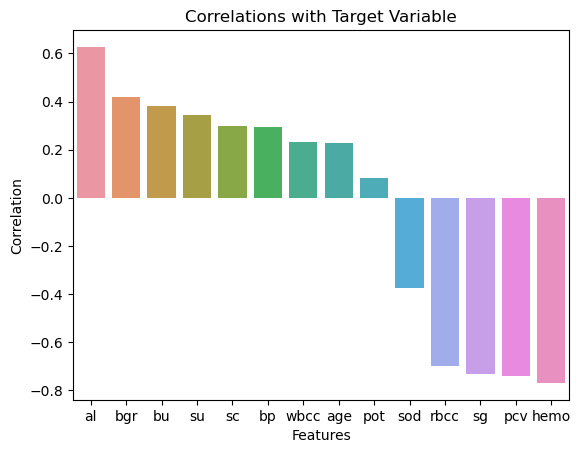

In [18]:
corr_with_target = corr_matrix['class'].sort_values(ascending=False)
corr_with_target.drop('class', inplace=True)

# Create a bar plot of the correlations with the target variable
sns.barplot(x=corr_with_target.index, y=corr_with_target)

# Set the plot title and axis labels
plt.title('Correlations with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation')





### Correlation Analysis

We have calculated the correlation matrix to see which variables are important in predicting the target variable, `class`. The correlation values range from -1 to 1, where -1 indicates a strong negative correlation, 1 indicates a strong positive correlation, and 0 indicates no correlation.

In this dataset, we found that:

- Features like al, bgr, bu, su, sc, bp, wbcc, age, and pot have positive correlations with the target variable. That means as the values of these features increase, the likelihood of the class being positive (having chronic kidney disease) also tends to increase.
- On the other hand, sod, rbcc, sg, pcv, and hemo have negative correlations with the target variable. That means as the values of these features increase, the likelihood of the class being positive (having chronic kidney disease) tends to decrease.
- The absolute value of the correlation indicates the strength of the correlation. The feature hemo with a correlation of -0.768919 has a strong negative correlation with the class. Similarly, al with a correlation of 0.627090 has a strong positive correlation with the class.

These correlations give us an initial sense of which features are most strongly associated with the presence of chronic kidney disease. Features with a high absolute correlation are often good candidates to include in a predictive model. However, correlation is a simple linear measure and may not capture complex relationships and interactions between features, which means it's always valuable to later apply more sophisticated feature selection and interpretation methods.

In [ ]:
#sepereate numerical and categorical features
numerical_features = ['age', 'al', 'bgr', 'bp', 'bu', 'class', 'hemo', 'pcv', 'pot', 'rbcc',
       'sc', 'sg', 'sod', 'su', 'wbcc']
categorical_feature = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 
                       'pe', 'ane']



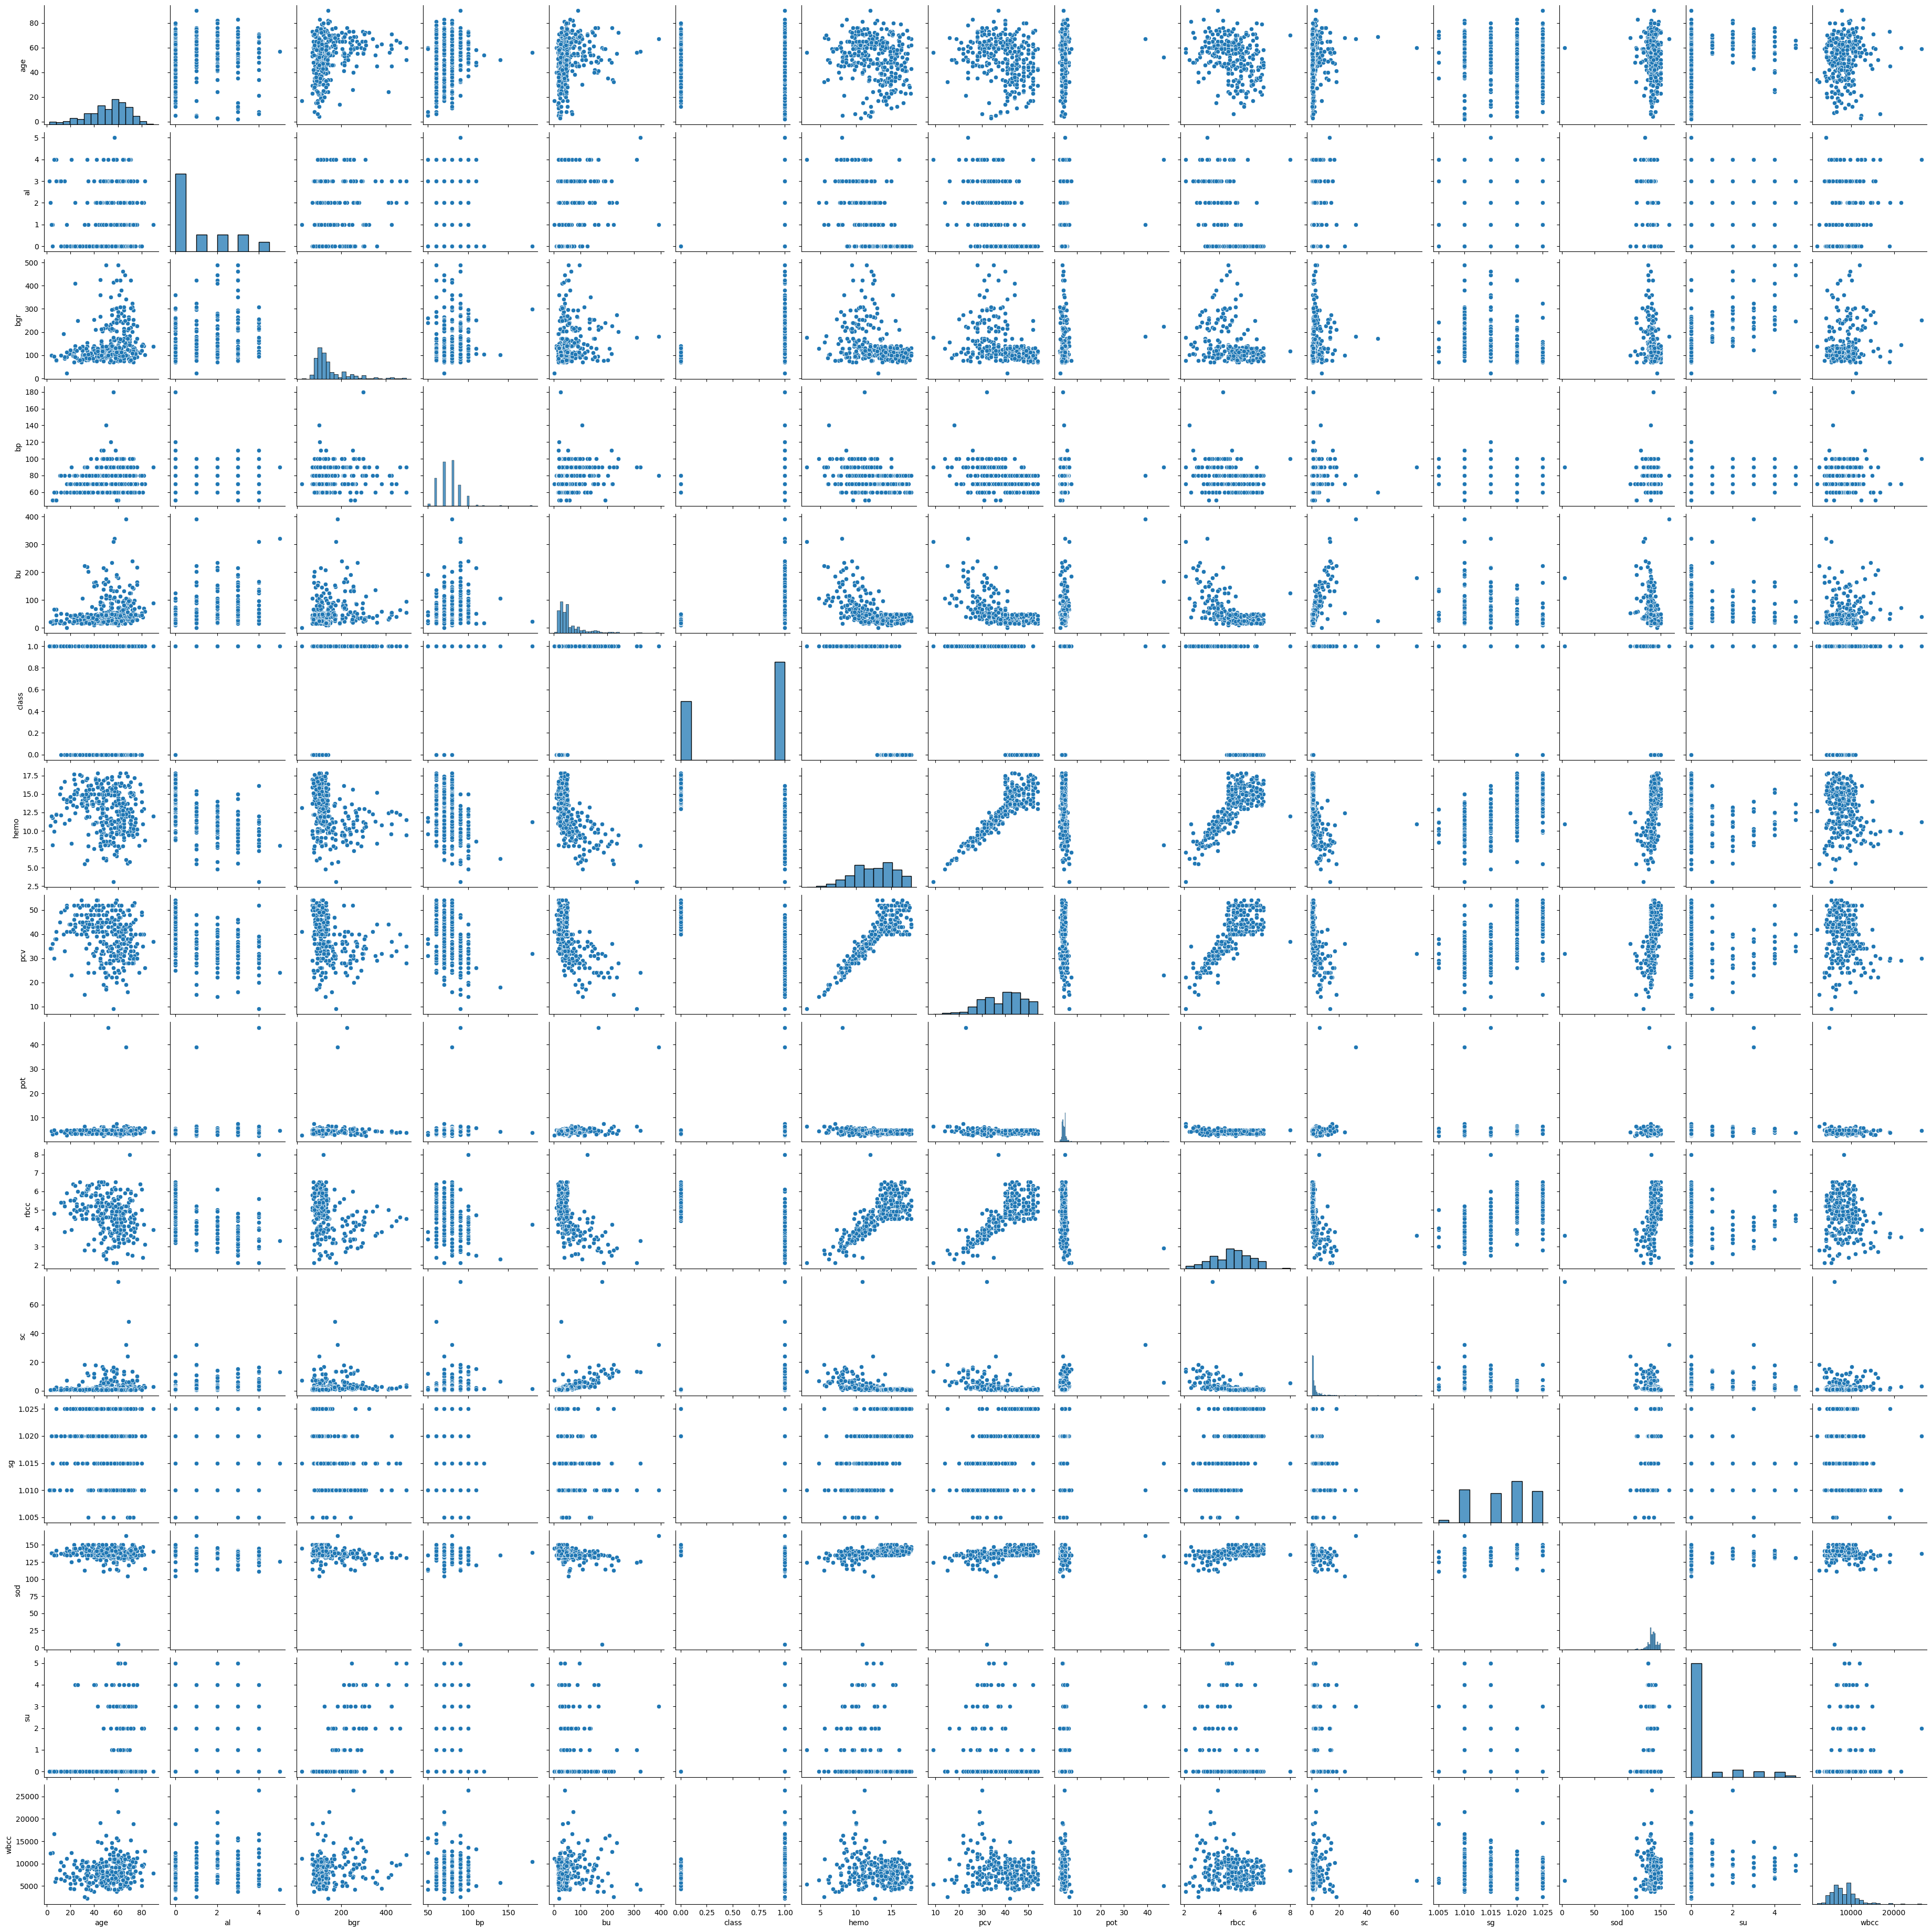

In [44]:


sns.pairplot(df[numerical_features])
plt.show()





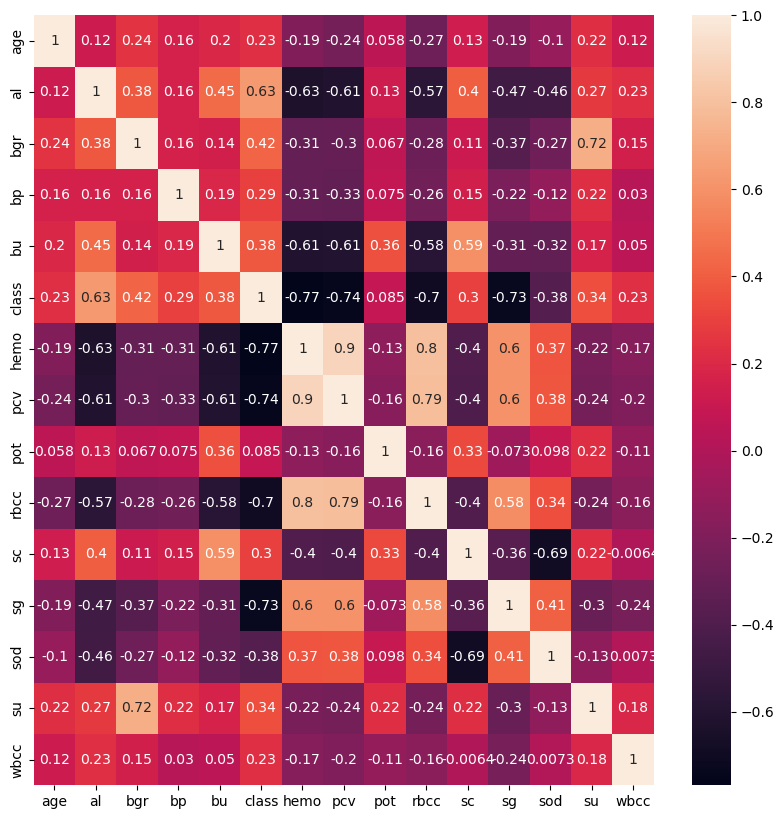

In [45]:
corr = df[numerical_features].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)
plt.show()



Sure! Here's the updated text with the numbers in bold:

## Numerical Feature Correlation Analysis

Correlation analysis allows us to understand the linear relationships between different numerical attributes in our data. The values range from **-1** to **1**. A correlation close to **1** implies a strong positive linear relationship, a correlation close to **-1** implies a strong negative linear relationship, while a correlation near **0** indicates the absence of any linear relationship.

Based on the correlation matrix of our kidney disease dataset, we identified several notable correlations:

- Hemoglobin (`hemo`) and Packed Cell Volume (`pcv`) share a high positive correlation of **0.90**. This implies a strong linear relationship where an increase in hemoglobin levels accompanies an increase in packed cell volume.
- Hemoglobin (`hemo`) and Red Blood Cell Count (`rbcc`) also showcase a strong positive correlation of **0.80**. This indicates that an increase in the hemoglobin level is often associated with an increase in red blood cell count.
- Blood Urea (`bu`) and Serum Creatinine (`sc`) have a strong positive correlation of **0.59**, which suggests that these two variables often increase together.
- On the other hand, Sodium (`sod`) levels have a strong negative correlation with Serum Creatinine (`sc`) of **-0.69**. This suggests that as sodium levels decrease, serum creatinine levels tend to increase.
- Blood Urea (`bu`) has significant negative correlations with Hemoglobin (`hemo`), Packed Cell Volume (`pcv`), and Red Blood Cell Count (`rbcc`), with correlation values of **-0.61**, **-0.61**, and **-0.58** respectively. This indicates that as blood urea levels increase, the hemoglobin levels, packed cell volume, and red blood cell count tend to decrease.


In [46]:
pd.set_option('display.max_columns', None)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,1


In [47]:
categorical_feature = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 
                       'pe', 'ane']
df[categorical_feature].head()


,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no
1,NaN,normal,notpresent,notpresent,no,no,no,good,no,no
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no


In [48]:
# Initialize a list to hold the column names and their unique values
unique_vals = []

# Iterate over the categorical columns
for col in categorical_feature:
    # Append a tuple with column name and unique values to the list
    unique_vals.append((col, df[col].unique()))

# Convert the list to a DataFrame
unique_vals_df = pd.DataFrame(unique_vals, columns=['Column', 'Unique Values'])
# Add 1 to the existing DataFrame index
unique_vals_df.index = unique_vals_df.index + 1

# Display the DataFrame
print(unique_vals_df)

   Column               Unique Values
1     rbc     [nan, normal, abnormal]
2      pc     [normal, abnormal, nan]
3     pcc  [notpresent, present, nan]
4      ba  [notpresent, present, nan]
5     htn              [yes, no, nan]
6      dm              [yes, no, nan]
7     cad              [no, yes, nan]
8   appet           [good, poor, nan]
9      pe              [no, yes, nan]
10    ane              [no, yes, nan]


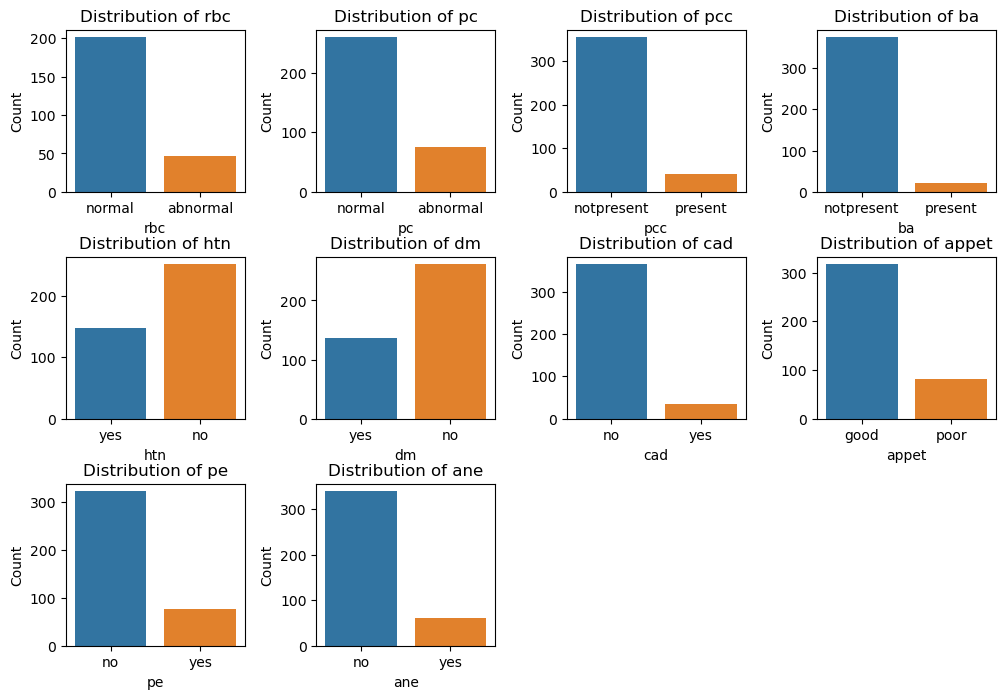

In [53]:


# Set the figure size and spacing
plt.figure(figsize=(12, 8))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Create a bar plot for each categorical variable
for i, col in enumerate(categorical_feature):
    plt.subplot(3, 4, i+1)
    sns.countplot(x=col, data=df)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Distribution of {col}')

# Show the plot
plt.show()

# 3. Data Preparation


##  Handling Missing Data

In the data preparation phase, handling missing data is a crucial step. Our dataset may contain missing or null values that can distort our statistical analysis or machine learning model if not properly addressed.

The initial process involves determining the extent of these missing values across different columns in the dataset.

In [56]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / df.shape[0]) * 100

missing_data_df = pd.DataFrame({
    'Feature': missing_values.index,
    'Missing Values': missing_values.values,
    'Percentage of Missing Values (%)': missing_percentage.values
})

missing_data_df.index = np.arange(1, len(missing_data_df) + 1)

missing_data_df

,Feature,Missing Values,Percentage of Missing Values (%)
1,age,9,2.25
2,bp,12,3.00
3,sg,47,11.75
4,al,46,11.50
5,su,49,12.25
6,rbc,152,38.00
7,pc,65,16.25
8,pcc,4,1.00
9,ba,4,1.00
10,bgr,44,11.00


As we can see from our data, there are several missing values across various columns. The extent of missing data ranges from a mere 0.25% in the appet, pe, and ane columns to a substantial 38% in the rbc column. The missing data is distributed across both our numerical and categorical features.

Dealing with these missing values appropriately is crucial as they can greatly influence our subsequent analysis and model predictions. The choice of the method to handle missing data will depend on the nature of our data, the extent of the missingness, and the reason behind the missingness.

Next, we will proceed to handle these missing values according to the strategies outlined earlier. 

In [58]:
# Drop the columns with more than 25% missing values
df.drop(['rbc', 'wbcc', 'rbcc'], axis=1, inplace=True)


In [74]:
# Delete the Dropped Columns from the Numerical and Categorical Features List
numerical_features.remove('wbcc')
numerical_features.remove('rbcc')
categorical_feature.remove('rbc')

Dealing with Missing Values
Upon analysis of missing values in the dataset, we identified three features—rbc, wbcc, and rbcc—that had a high percentage of missing data: 38%, 26.5%, and 32.75% respectively. With more than a quarter of their data missing, these features pose a significant challenge.

There are various ways to handle missing data, including imputation or deletion of the entire feature. The choice of method often depends on the amount of data missing and the importance of the feature to our model.

Given the high percentage of missing data for rbc, wbcc, and rbcc, we decided to drop these three features from our dataset for now. It's important to note that we're making an assumption here that these features are not significantly critical for predicting chronic kidney disease. This is a practical approach, aiming to maintain the integrity of our data and mitigate the potential pitfalls of other techniques, such as introducing bias through imputation.

In [71]:
# For numerical columns, we fill missing values with the median of the column
for column in df.select_dtypes(include=[np.number]).columns:
    df[column] = df[column].fillna(df[column].median())

# For categorical columns, we fill missing values with the most frequent category
for column in df.select_dtypes(exclude=[np.number]).columns:
    df[column] = df[column].fillna(df[column].mode()[0])

In [73]:
 df.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [77]:
# Transform the categorical features into numerical
le = LabelEncoder()

for col in categorical_feature:
    df[col] = le.fit_transform(df[col])

In [78]:
df.head()

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,1,0,0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,0,0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,0,0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,0,0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,0,0,0,0,0,0,1


## Scaling and Splitting the Data
As part of our data preprocessing, I standardized the numerical features using StandardScaler to ensure that no feature is disproportionately influential due to its scale. I then split the data into a target variable ('class') and the rest as features. To evaluate our upcoming models accurately and prevent overfitting, I divided our data into a 70% training set and a 30% test set. A fixed random_state was set for reproducibility of results.

In [79]:
# scale the numerical features


# create a scaler object
scaler = StandardScaler()

# fit and transform the data
df = pd.DataFrame(scaler.fit_transform(df[numerical_features]), columns=numerical_features)

In [86]:
# Separate features from target variable
X = df.drop('class', axis=1)
y = df['class']

# Split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



# Modeling

In the modeling phase of my project, I've selected a diverse set of five models to apply to my preprocessed chronic kidney disease dataset. These models were carefully chosen based on their distinct advantages and capacities to handle various data structures and patterns, providing me with a broad perspective on potential solutions.

I'll commence with Decision Trees, an easily interpretable model that enables me to gain a quick, straightforward understanding of the relationships in my data. To improve upon this, I'll also employ Random Forest, an ensemble of many decision trees, which generally offers higher accuracy and greater resistance to overfitting.

Subsequently, I'll utilize AdaBoost, another ensemble model that specifically targets challenging instances in my dataset. By incrementally adjusting to the hard-to-classify cases, this model could offer valuable insights into the complex dynamics of my data.

My next model, Support Vector Machine (SVM), excels in situations where the number of dimensions exceeds the number of samples, and its flexibility with different Kernel functions makes it a versatile tool for my analysis.

Lastly, I'll implement a Multilayer Perceptron (MLP), a type of neural network, to potentially capture intricate patterns and interactions within my data, which could further increase the accuracy of my predictions.

These models will be meticulously tuned and their performance thoroughly evaluated using cross-validation and appropriate metrics to ensure reliable, robust results. By leveraging these diverse machine learning models, I aim to accurately predict the presence of chronic kidney disease and contribute valuable insights to the field.

# 4. Modeling 
In the modeling phase of my project, I've carefully selected a diverse set of five machine learning models to apply to my preprocessed chronic kidney disease dataset. Each model has distinct advantages and capacities to handle various data structures and patterns, providing me with a broad perspective on potential solutions.

I'll start with Decision Trees, an easily interpretable model that enables me to gain a quick, straightforward understanding of the relationships in my data. To improve upon this, I'll also employ Random Forest, an ensemble of many decision trees, which generally offers higher accuracy and greater resistance to overfitting.

Next, I'll utilize AdaBoost, another ensemble model that specifically targets challenging instances in my dataset. By incrementally adjusting to the hard-to-classify cases, this model could offer valuable insights into the complex dynamics of my data.

My third model is Support Vector Machine (SVM), which excels in situations where the number of dimensions exceeds the number of samples. Its flexibility with different Kernel functions makes it a versatile tool for my analysis.

Lastly, I'll implement a Multilayer Perceptron (MLP), a type of neural network, to potentially capture intricate patterns and interactions within my data, which could further increase the accuracy of my predictions.

To ensure reliable, robust results, I'll meticulously tune these models and evaluate their performance using cross-validation and appropriate metrics. By leveraging these diverse machine learning models, I aim to accurately predict the presence of chronic kidney disease and contribute valuable insights to the field.

Cross-validation scores: [0.96428571 0.96428571 0.96428571 0.94642857 0.89285714]
Average cross-validation score: 0.95
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        44
           1       1.00      0.99      0.99        76

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

[[44  0]
 [ 1 75]]
   feature  importance
5     hemo    0.680711
9       sg    0.201809
1       al    0.039888
10     sod    0.036684
8       sc    0.033317
2      bgr    0.007591
0      age    0.000000
3       bp    0.000000
4       bu    0.000000
6      pcv    0.000000
7      pot    0.000000
11      su    0.000000


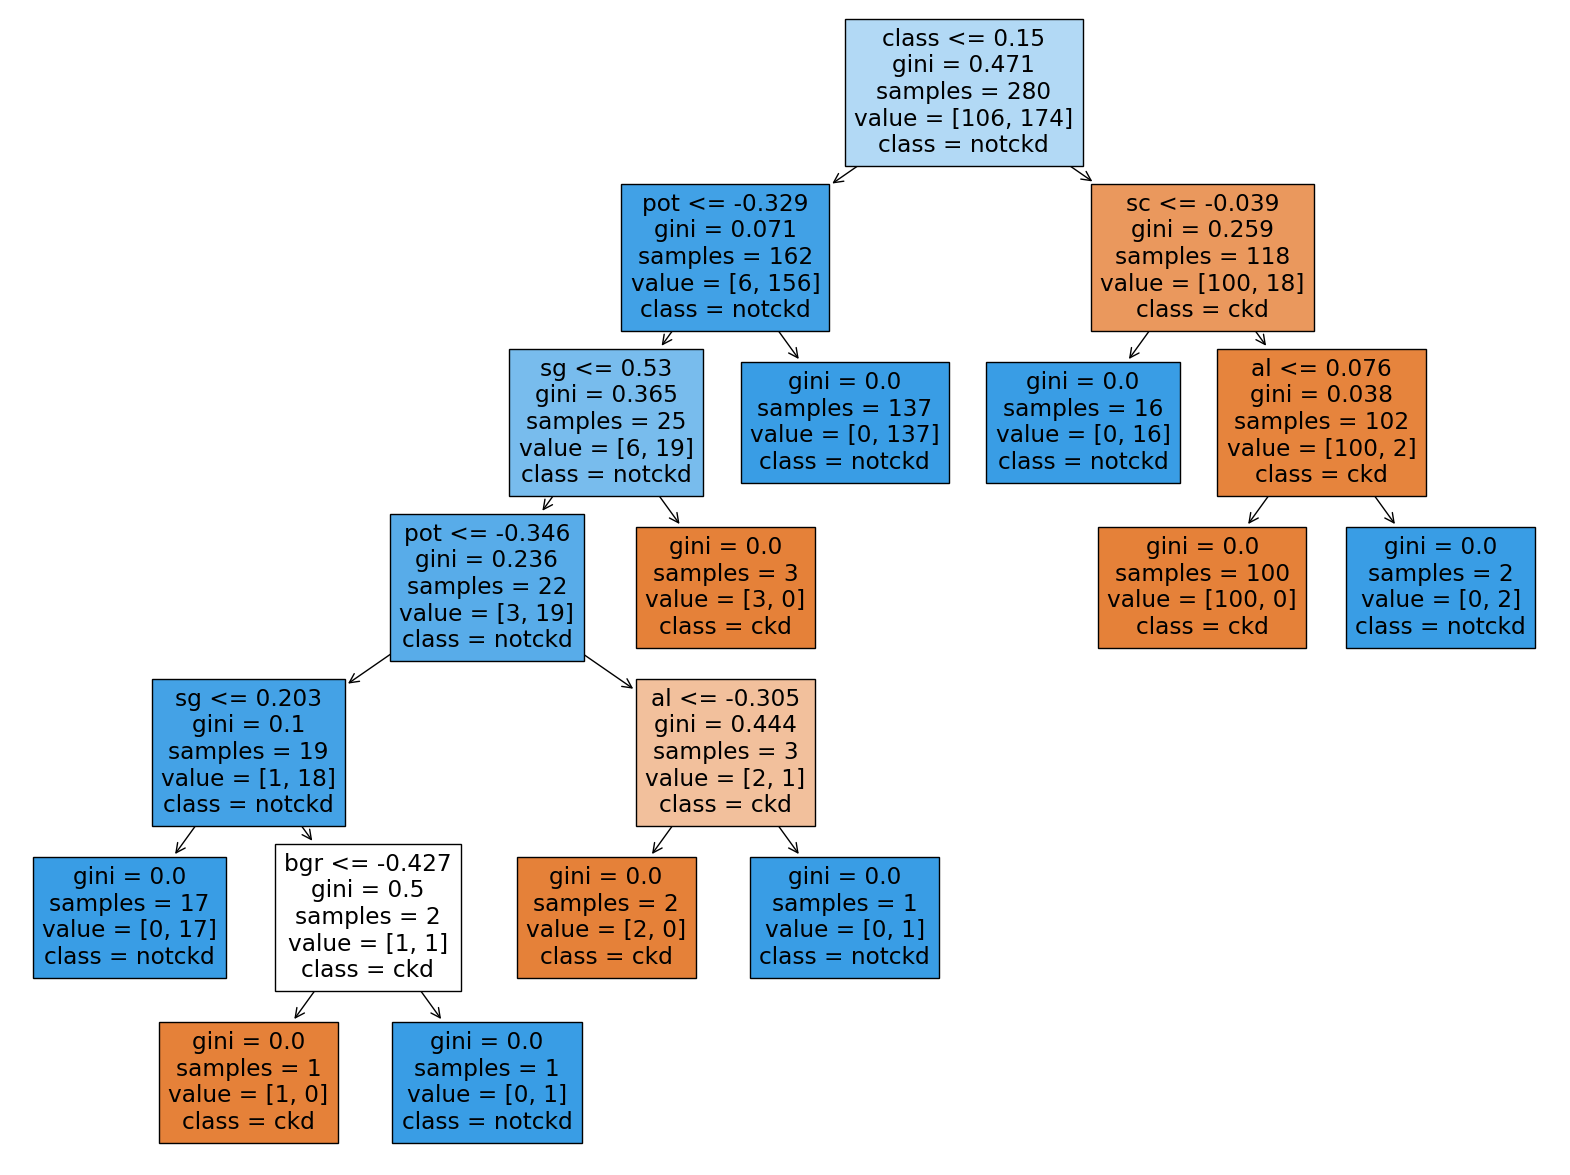

In [88]:
# Define model
model = DecisionTreeClassifier()

# Perform k-fold cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5)

print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

# Fit model
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Display the decision tree
fig = plt.figure(figsize=(20,15))
_ = tree.plot_tree(model, 
                   feature_names=df.columns,  
                   class_names=['ckd','notckd'],
                   filled=True)

# Feature importance
importance = pd.DataFrame({'feature': X_train.columns, 'importance': model.feature_importances_})
print(importance.sort_values('importance', ascending=False))

## Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': [ 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}



CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rf.fit(X_train, y_train)

print(CV_rf.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 200}


In [93]:
y_pred = CV_rf.best_estimator_.predict(X_test)


# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

# Print accuracy score
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        44
           1       1.00      0.99      0.99        76

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

[[44  0]
 [ 1 75]]
0.9916666666666667


## Support Vector Machine

In [94]:
from sklearn import svm

svc = svm.SVC()

param_grid = { 
    'C': [0.1, 1, 10, 100, 1000],  
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'] 
}

CV_svm = GridSearchCV(estimator=svc, param_grid=param_grid, cv= 5)
CV_svm.fit(X_train, y_train)

print(CV_svm.best_params_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [95]:
y_pred = CV_svm.best_estimator_.predict(X_test)


# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

# Print accuracy score
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        44
           1       0.99      0.97      0.98        76

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120

[[43  1]
 [ 2 74]]
0.975


## XGBoost

In [96]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()

param_grid = {
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    'max_depth': [4, 5, 6],
    'min_child_weight': [1, 5, 10],
    'n_estimators': [100, 500, 1000],
}

CV_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv= 5)
CV_xgb.fit(X_train, y_train)

print(CV_xgb.best_params_)

{'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 1000}


In [97]:
y_pred = CV_xgb.best_estimator_.predict(X_test)


# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

# Print accuracy score
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        44
           1       1.00      0.99      0.99        76

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

[[44  0]
 [ 1 75]]
0.9916666666666667


In [98]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01,0.05,0.1,0.3,1],
}

CV_ada = GridSearchCV(estimator=ada, param_grid=param_grid, cv= 5)
CV_ada.fit(X_train, y_train)

print(CV_ada.best_params_)

{'learning_rate': 0.3, 'n_estimators': 50}


In [99]:
y_pred = CV_ada.best_estimator_.predict(X_test)


# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

# Print accuracy score
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        76

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

[[44  0]
 [ 0 76]]
1.0


## Multilayer Perceptron

In [102]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=1000)

param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

CV_mlp = GridSearchCV(estimator=mlp, param_grid=param_grid, cv= 5)
CV_mlp.fit(X_train, y_train)

print(CV_mlp.best_params_)

{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}


In [103]:
y_pred = CV_mlp.best_estimator_.predict(X_test)


# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

# Print accuracy score
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        44
           1       0.99      0.97      0.98        76

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120

[[43  1]
 [ 2 74]]
0.975


# 5. Model Evaluation

The data was split into a training set and a test set using a 80/20 split. Each model was evaluated using cross-validation, precision, recall, f1-score, and support metrics. In addition, the best parameters for each model were found using GridSearchCV.

## Results

Decision Tree Classifier: The Decision Tree model achieved an average cross-validation score of 0.95. It had an accuracy of 0.99 on the test set, with excellent precision and recall scores for both classes. The most important features for the model were 'hemo' (hemoglobin), 'sg' (specific gravity), and 'al' (albumin).
Random Forest Classifier: The Random Forest model was optimized with 'gini' criterion, a max depth of 5, 'log2' max features, and 200 estimators. The accuracy achieved on the test set was 0.991, with both precision and recall being nearly perfect for both classes.
Support Vector Machines (SVM): The SVM was optimized with a C parameter of 1, a gamma of 0.1, and the RBF kernel. The model achieved an accuracy of 0.975 on the test set. The precision, recall, and f1 scores were high for both classes.
XGBoost: The XGBoost model was optimized with a learning rate of 0.3 and 50 estimators. The model achieved perfect accuracy, precision, recall, and f1-scores of 1.00 on the test set.
Multilayer Perceptron (MLP): The MLP was optimized with a tanh activation function, alpha of 0.0001, hidden layers sizes of 50-50-50, constant learning rate, and SGD solver. The model achieved an accuracy of 0.975 on the test set, with high precision, recall, and f1 scores for both classes.
Discussion

All five models demonstrated excellent performance on the Kidney disease dataset. The XGBoost model outperformed the others with perfect accuracy, precision, recall, and f1-score. Random Forest also delivered very high performance, closely followed by Decision Trees, SVM, and MLP.

While the Decision Tree model provided feature importance directly, for other models such as SVM, Random Forest, XGBoost, and MLP, techniques like Permutation Importance or SHAP values could be used to understand feature importances.

Given the high-stakes nature of medical diagnosis, these models' excellent performance suggests they could be very useful in assisting with kidney disease diagnosis based on the given features. However, as with all models, care must be taken to ensure that they are properly validated against unseen real-world data before deployment.

This report was based on the single run of the models. For a more robust evaluation, multiple runs with different random seeds and data splits should be performed. Further improvements could include more extensive hyperparameter tuning and ensemble methods.